<a href="https://colab.research.google.com/github/thimontenegro/Data-Science/blob/master/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoders


* We will use autoencoders for dimensionality reduction and noise removal.

* During the training of certain models, we will sometimes, use historical data with correct labels, however during the actual use of the model, we won't be able to use our previous evaluation metrics.

* Unsupervisded Learning means we won't have 'correct' labels to comapare our results to.

* Our use case for autoencoders in this sections are sometimes called semi-supervised.

* Semi-supervised because we have the ability to use correct labels during the training of the autoencoders, but actually using the autoencoder we can't produce metrics such as accuracy or RMSE.



## Basics

* The autoencoder is actually a very simple neural network and feel similar to multi-layer perceptron model.

* It  is designed to reproduce its input at the output layer.

* The key difference between an autoencoder and a typical MLP network is that the number of input neurons is equal to the number of output neurons.

* Let's explore what this looks like and why we would use it!

* The Shape of A AutoEncoder is:

  * 5 inputs neurons

  * 3 Neurons on second layer

  * 2 Neurons on third layer

  * 3 Neurons on four layer

  * 5 neurons as ouput layer

* In order to produce the same output at the final layer, the internal hidden layers must learn what features are important.

* Here we see a design of 5 dimensions reduced to 2 dimensions, then expaded back to the original 5

  * 5 input neurons, 2 neurons on hidden layer, 5 output neurons

* Feed forward network trained to reproduce its input at the output layer

* Output size is the same as the output layer

* The hidden representation attemps to maintain the important input information.

* We can then use the hidden layer to extact meaninful insights

* This idea is extremy similar to PCA - Principal Component Analysis

* important Note!

  * The hidden layer is not simple sub-selecting only certain features.

  * Its calculating combinations of the original features represent the original data in a reduced dimensional space.


* The main ideia behind an autoencoder:

  * The center hidden layer reduced the dimensionality to learn the most important combinations of original features.

* We'll explore 2 use cases:

  * Dimensionality Reduction

  * Noise removal



## Autoencoder for Dimensionality Reduction
* We can use an autoencoder for dimensionality reduction by separating it out into 2 parts:

  * Encoder

  * Decoder

* This encoder can now sucessfully reduce dimensionality of the original data by taking combinations of the original features

* Dimensionality Reduction

  * Compress Data

  * Visualize data in lower dimensions

  * Reveal hidden relationships not cleary seen in higher dimensions

  

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from sklearn.datasets import make_blobs

In [0]:
df = make_blobs(n_samples = 300, n_features = 2, centers = 2, cluster_std= 1.0,random_state=101)

In [5]:
df

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [0]:
X,y = df

In [0]:
np.random.seed(seed = 101)
z_noise = np.random.normal(size = len(X))
z_noise = pd.Series(z_noise)

In [8]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [0]:
feat = pd.DataFrame(X)
feat = pd.concat([feat, z_noise], axis = 1)

In [10]:
feat.columns = ['X1', 'X2', 'X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


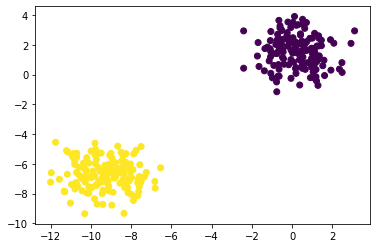

In [11]:
plt.scatter(feat['X1'], feat['X2'], c = y)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

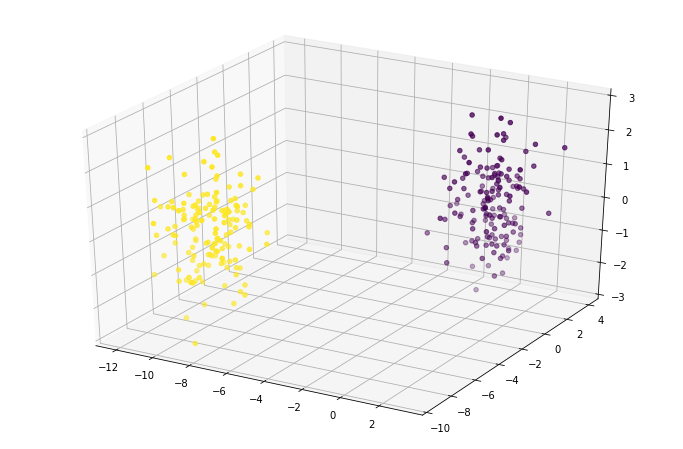

In [13]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c= y)



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
from tensorflow.keras.optimizers import SGD

In [0]:
# 3 ----> 2 ----> 3

In [0]:
encoder = Sequential()
encoder.add(Dense(units = 2, activation= 'relu', input_shape = [3]))


In [0]:
decoder = Sequential()
decoder.add(Dense(units = 3, activation = 'relu', input_shape = [2]))

In [0]:
autoencoder = Sequential([encoder, decoder])


In [0]:
autoencoder.compile(loss = 'mse', optimizer = SGD(lr = 1.5))

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [23]:
autoencoder.fit(scaled_data, scaled_data, epochs = 5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 2ms/sample - loss: 0.3350
Epoch 2/5
300/300 [==============================] - 0s 77us/sample - loss: 0.3350
Epoch 3/5
300/300 [==============================] - 0s 63us/sample - loss: 0.3350
Epoch 4/5
300/300 [==============================] - 0s 56us/sample - loss: 0.3350
Epoch 5/5
300/300 [==============================] - 0s 55us/sample - loss: 0.3350


In [0]:
encoded_2dm = encoder.predict(scaled_data)

In [25]:
encoded_2dm.shape

(300, 2)

In [26]:
scaled_data.shape

(300, 3)

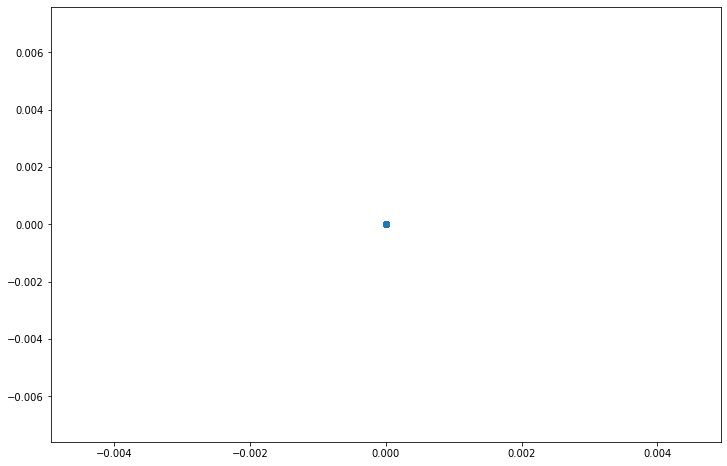

In [27]:
plt.figure(figsize = (12,8))
plt.scatter(encoded_2dm[:,0], encoded_2dm[:,1])
plt.show()

## For images

* We've already seen that even simple images are high dimensional datasets.

* Recall a simple 28x28 image has 784 features/dimensions


In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

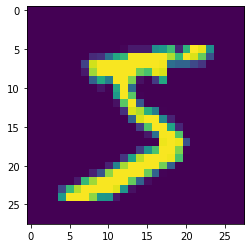

In [30]:
plt.imshow(X_train[0])

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [34]:
28 * 28

784

In [35]:
784 /2

392.0

In [0]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(400,activation = 'relu'))
encoder.add(Dense(200,activation = 'relu'))
encoder.add(Dense(100,activation = 'relu'))
encoder.add(Dense(50,activation = 'relu'))
encoder.add(Dense(25,activation = 'relu'))

In [0]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, input_shape = [50], activation = 'relu'))
decoder.add(Dense(200, input_shape = [100], activation = 'relu'))
decoder.add(Dense(400, input_shape = [200], activation = 'relu'))
decoder.add(Dense(784, activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [0]:
autoencoder = Sequential([encoder, decoder])

In [0]:
autoencoder.compile(loss ='binary_crossentropy', optimizer = SGD(lr = 1.5), metrics = ['accuracy'])

In [40]:
autoencoder.fit(X_train, X_train, epochs = 5, validation_data = [X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 23s 389us/sample - loss: 0.2497 - accuracy: 0.7911 - val_loss: 0.2157 - val_accuracy: 0.7925
Epoch 2/5
60000/60000 [==============================] - 23s 384us/sample - loss: 0.1895 - accuracy: 0.7975 - val_loss: 0.1684 - val_accuracy: 0.7994
Epoch 3/5
60000/60000 [==============================] - 22s 374us/sample - loss: 0.1607 - accuracy: 0.8018 - val_loss: 0.1578 - val_accuracy: 0.8034
Epoch 4/5
60000/60000 [==============================] - 23s 377us/sample - loss: 0.1475 - accuracy: 0.8043 - val_loss: 0.1455 - val_accuracy: 0.8065
Epoch 5/5
60000/60000 [==============================] - 23s 380us/sample - loss: 0.1403 - accuracy: 0.8059 - val_loss: 0.1348 - val_accuracy: 0.8043


In [0]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


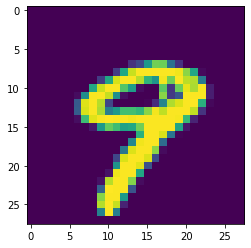

Attempted Reconstruction (after)


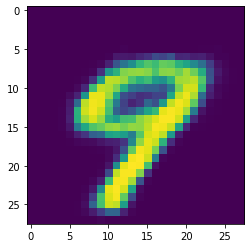

In [42]:
n = 9

print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Attempted Reconstruction (after)')
plt.imshow(passed_images[n])

In [0]:
from tensorflow.keras.layers import GaussianNoise

In [0]:
import tensorflow as tf

In [0]:
sample = GaussianNoise(0.2)

In [0]:
noisey = sample(X_test[0:10],training=True)

Original Image


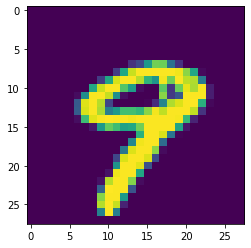

Noise Version (after)


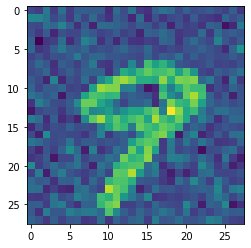

In [50]:
n = 9

print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Noise Version (after)')
plt.imshow(noisey[n])

In [0]:
tf.random.set_seed(101)
np.random.seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation = 'relu'))
encoder.add(Dense(200,activation = 'relu'))
encoder.add(Dense(100,activation = 'relu'))
encoder.add(Dense(50,activation = 'relu'))
encoder.add(Dense(25,activation = 'relu'))
 



In [0]:
decoder = Sequential()
decoder.add(Dense(50, input_shape = [25], activation = 'relu'))
decoder.add(Dense(100, input_shape = [50], activation = 'relu'))
decoder.add(Dense(200, input_shape = [100], activation = 'relu'))
decoder.add(Dense(400, input_shape = [200], activation = 'relu'))
decoder.add(Dense(784, activation ='sigmoid'))
decoder.add(Reshape([28,28]))

In [0]:
noise_remover = Sequential([encoder, decoder])

In [0]:
noise_remover.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate= 1.5), metrics = ['accuracy'])

In [55]:
noise_remover.fit(X_train,X_train, epochs = 10, validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.2549 - accuracy: 0.7916 - val_loss: 0.2219 - val_accuracy: 0.7919
Epoch 2/10
60000/60000 [==============================] - 23s 387us/sample - loss: 0.1957 - accuracy: 0.7963 - val_loss: 0.1741 - val_accuracy: 0.7986
Epoch 3/10
60000/60000 [==============================] - 23s 391us/sample - loss: 0.1624 - accuracy: 0.8015 - val_loss: 0.1533 - val_accuracy: 0.8005
Epoch 4/10
60000/60000 [==============================] - 24s 394us/sample - loss: 0.1499 - accuracy: 0.8041 - val_loss: 0.1448 - val_accuracy: 0.8031
Epoch 5/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.1412 - accuracy: 0.8059 - val_loss: 0.1352 - val_accuracy: 0.8039
Epoch 6/10
60000/60000 [==============================] - 24s 392us/sample - loss: 0.1363 - accuracy: 0.8068 - val_loss: 0.1328 - val_accuracy: 0.8044
Epoch 7/10
60000/60000 [====================

In [0]:
ten_noisey_images = sample(X_test[:10], training = True)

In [0]:
denoised = noise_remover(ten_noisey_images)

Original Image


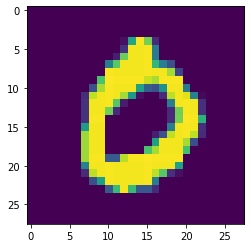

Noise Added Image


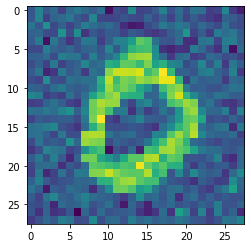

After noise Removal From Autoencoder


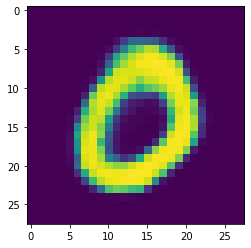

In [59]:
n = 3
print('Original Image')
plt.imshow(X_test[n])
plt.show()
print('Noise Added Image')
plt.imshow(ten_noisey_images[n])
plt.show()

print('After noise Removal From Autoencoder')
plt.imshow(denoised[n])
plt.show()

## AutoEncoder Exercise 

* The purpose of this exercise is to answer the following question:

  * Given a dataset of average eating habits between countries in the United Kingdom, does any particular country stand out as different?



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv('/content/drive/My Drive/UK_foods.csv', index_col = 'Unnamed: 0')

In [64]:
df.head(10)

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [65]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


Create a heatmap from the DF. Does any country really stand out as different than others? It should be tricky to tell just from the image.

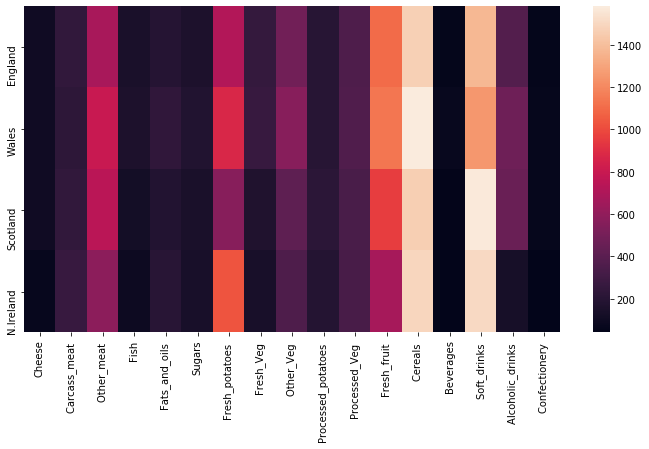

In [71]:
correlation = df.corr().transpose()
plt.figure(figsize = (12,6))
sns.heatmap(df.transpose())

Run the imports necessary to build an autoencoder. Our goal will be to reduce the dimensions from 17 -> 2 and see if any country stand out as very different

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Auto encoder. In the solutions we built one that went 17 --> 8 --> 4 --> 2

In [0]:
encoder = Sequential()

encoder.add(Dense(units = 8, activation= 'relu', input_shape = [17]))
encoder.add(Dense(units = 4, activation= 'relu', input_shape = [8]))
encoder.add(Dense(units = 2, activation= 'relu', input_shape = [4]))

In [0]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [0]:
autoencoder = Sequential([encoder, decoder])

In [0]:
autoencoder.compile(loss = 'mse', optimizer = SGD(lr = 1.5), metrics = ['accuracy'])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()


scaled_df = scaler.fit_transform(df.transpose().values)

In [82]:
scaled_df.shape

(4, 17)

In [121]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.1837 - accuracy: 0.0000e+00
Epoch 2/15
4/4 [==============================] - 0s 823us/sample - loss: 0.1013 - accuracy: 0.2500
Epoch 3/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.0926 - accuracy: 0.2500
Epoch 4/15
4/4 [==============================] - 0s 974us/sample - loss: 0.1309 - accuracy: 0.0000e+00
Epoch 5/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.0808 - accuracy: 0.2500
Epoch 6/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.0846 - accuracy: 0.2500
Epoch 7/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 8/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.1557 - accuracy: 0.0000e+00
Epoch 9/15
4/4 [==============================] - 0s 929us/sample - loss: 0.0789 - accuracy: 0.2500
Epoch 10/15
4/4 [==============================] - 0s 969us/sample - loss: 0.

In [0]:
encoded_2dim = encoder.predict(scaled_df)

In [126]:
encoded_2dim

array([[0.       , 1.5570257],
       [0.       , 3.4369614],
       [0.       , 0.2876992],
       [0.       , 0.       ]], dtype=float32)

In [0]:
results = pd.DataFrame(data = encoded_2dim, index = df.transpose().index, columns = ['C1', 'C2'])

In [0]:

results = results.reset_index()

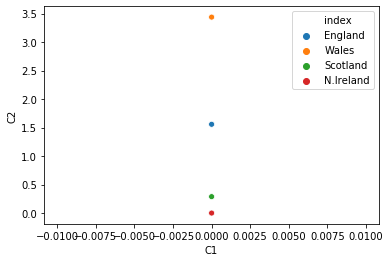

In [131]:
sns.scatterplot(x = 'C1', y = 'C2', data = results, hue = 'index')